<a href="https://colab.research.google.com/github/sedrisella/Pemrograman-python/blob/main/Task_7_Modul_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 7 MODUL 9





##Machine Learning : Regresi Linear Car Price




###1. Mengimport Library

In [12]:
#MengImport library pandas
import pandas as pd


In [13]:
#MengImport library numpy
import numpy as np


In [14]:
#MengImport library matplotlip dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as pd
 

In [15]:
#MengImport modul linear regression digunakan untuk membagi algoritma linear regresion
from sklearn.linear_model import LinearRegression

In [16]:
#MengImport modul train_test_split digunakan untuk membagi data kita menjadi traning dan testing set
from sklearn.model_selection import train_test_split

In [17]:
#MengImport math agar program dapat menggunkan semua fungsi yang ada pada modul math(exisqrt)
import math

In [18]:
#Me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

###2. Cek Data set

In [21]:


# membaca dataset
dataset = pd.read_csv('CarPrice_Assignment.csv')

# menampilkan 10 data teratas
print(dataset.head(10))

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          f

In [22]:
#Melihat Info Dataset
#Fungsi dari dataset.info() adalah untuk menampilkan informasi mengenai dataset, seperti jumlah baris dan kolom, nama kolom, 
#jumlah nilai yang hilang (missing values), tipe data kolom, dan penggunaan memori.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [23]:
#Fungsi dataset.isna().sum() digunakan untuk menghitung jumlah nilai yang hilang (missing values) pada setiap
#kolom dalam dataset.
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

tidak terdapat missing values

###4. Cek Korelasi



Untuk dapat menentukan lebih detail/akurat dalam pemilihan fitur.Dapat dilihat dari hubungan
korelasinya dengan function corn()





In [24]:
dataset.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


Terlihat enginesize memiliki korelasi yang signifikan dengan harga/price

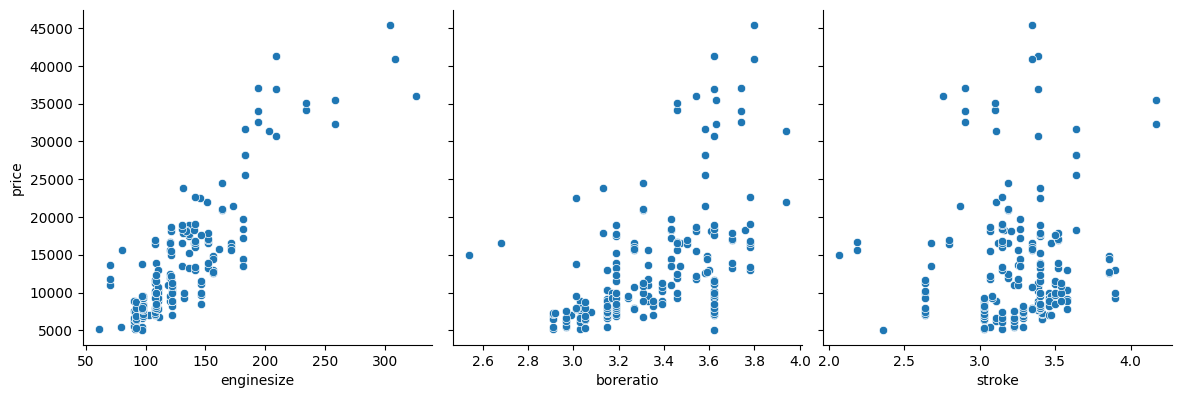

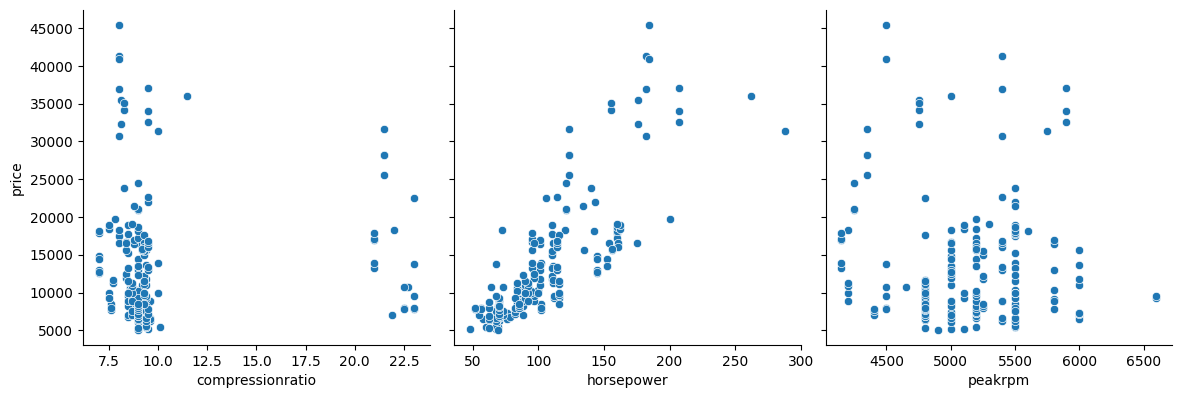

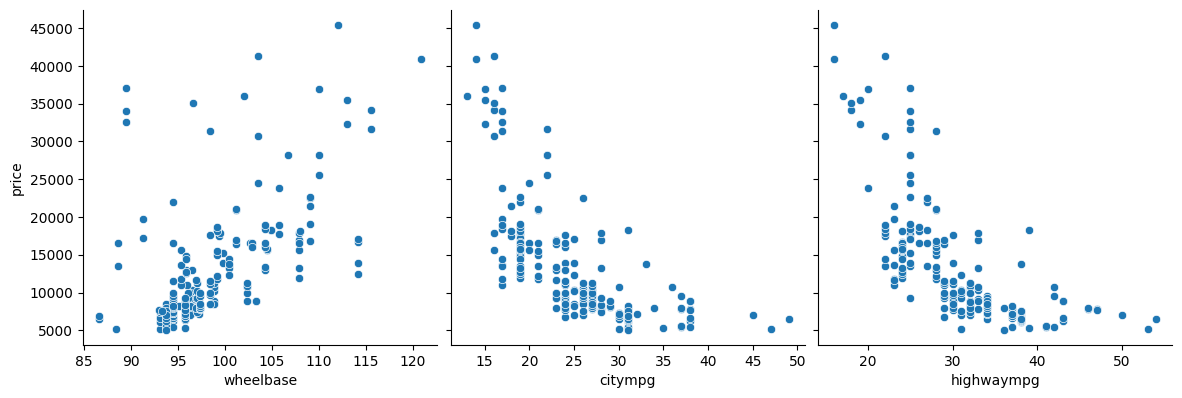

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# membaca dataset
dataset = pd.read_csv('CarPrice_Assignment.csv')

# definisi fungsi pp()
def pp(x,y,z):
  sns.pairplot(dataset,x_vars=[x,y,z],y_vars='price',size=4,aspect=1,kind='scatter')
  plt.show()

# memanggil fungsi pp() untuk menghasilkan plot
pp('enginesize','boreratio','stroke')
pp('compressionratio','horsepower','peakrpm')
pp('wheelbase','citympg','highwaympg')


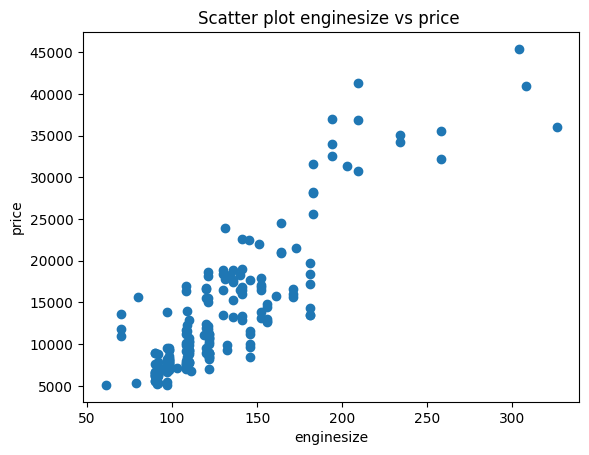

In [27]:
plt.scatter(dataset['enginesize'],dataset['price'])
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Scatter plot enginesize vs price ')
plt.show()

###5. Membangun Model

Dari hasil visualisasi di atas bahwa fitur atau kolom enginesize memiliki korelasi yang tinggi terhadap kolom price atau variabel dependent sehingga
kita mengambil fitur kolom enginesize untuk di training


*   Independent variabel(x) adalah enginesize
*  Dependent variabel(y) adalah price





In [31]:
#Mengubah bentuk matriks dengan reshape
x=dataset['enginesize'].values.reshape(-1,1)
y=dataset['price'].values.reshape(-1,1)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

In [33]:
regressor=LinearRegression()

In [34]:
regressor.fit(x_train,y_train)

LinearRegression()

In [35]:
#Mengecek nilai koefisien dan intersep
print(regressor.coef_)
print(regressor.intercept_)

[[168.17363122]]
[-8037.06049611]


In [36]:
#Mengecek score model
regressor.score(x_test,y_test)

0.8068161903454086

In [37]:
#Melihat nilai x_test
print(x_test)

[[ 98]
 [109]
 [122]
 [ 98]
 [108]
 [122]
 [130]
 [140]
 [146]
 [181]
 [141]
 [121]
 [120]
 [110]
 [308]
 [ 92]
 [ 98]
 [121]
 [140]
 [156]
 [141]
 [141]
 [194]
 [ 90]
 [146]
 [181]
 [156]
 [183]
 [108]
 [119]
 [ 92]
 [209]
 [152]
 [141]
 [120]
 [110]
 [121]
 [146]
 [ 97]
 [122]
 [304]]


Text(0.5, 1.0, 'Scatter plot enginesize vs price ')

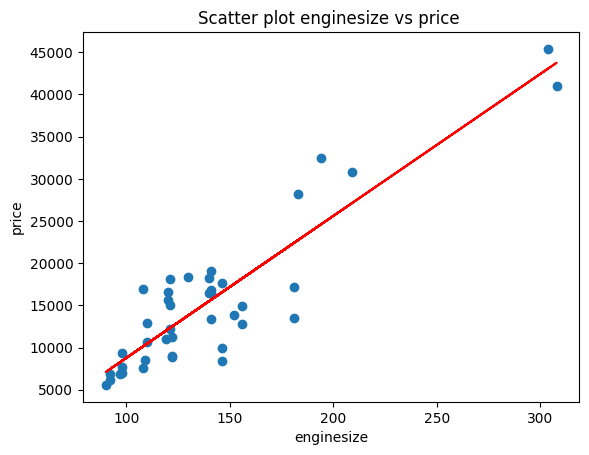

In [38]:
#Prediksi dataset
y_prediksi=regressor.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_prediksi,c='r')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Scatter plot enginesize vs price ')


In [40]:
#Memprediksi harga mobil dengan nilai enginesize tertentu
print('nilai prediksi harga dengan enginesize 100 :',regressor.predict([[90]]))
print('nilai prediksi harga dengan enginesize 150 :',regressor.predict([[150]]))
print('nilai prediksi harga dengan enginesize 200 :',regressor.predict([[200]]))

nilai prediksi harga dengan enginesize 100 : [[7098.5663135]]
nilai prediksi harga dengan enginesize 150 : [[17188.98418658]]
nilai prediksi harga dengan enginesize 200 : [[25597.66574748]]
